Importa o modelo a ser fatiado e mapeado

In [37]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/Lingote9025.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -7.752, model zmax = 15, first plane Z = -9.748, number of planes = 14
-Incremental, Lingote9025.stl, thickness = 2, #T = 432, #P = 12, #S = 384, 8.3e-05s (slicing), 0.000485s (polygon assembling), 0.003566s (total), *K: 0.888889


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 0.7485072612762451
salvando as camadas
Total de [salvando as camadas] : 0.26156187057495117
Total de [Fase 0: ] : 1.0106306076049805


Paredes Finas

In [38]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
configuracoes = files.Config("solda_config.yaml")
[d_tw, sob_tw_per, name_prog] = gui.ask_parameters_thin_walls(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_tw, sob_tw_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 0.8501756191253662
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0007898807525634766
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01565408706665039
Total de [Fase 1: Camada: 0] : 0.8740973472595215
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 0.8589677810668945
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0005352497100830078
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.010840654373168945
Total de [Fase 1: Camada: 1] : 0.875861644744873
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.6551148891448975
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0004227161407470703
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.04264402389526367
Total de [Fase 1: Camada: 2] : 0.703

Contornos

In [39]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[void_max,external_max,internal_max,d_cont,sob_cont_per,name_prog] = gui.ask_parameters_offsets(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max, d_cont, sob_cont_per, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 3
Total de [Criando Lvls] : 0.5132720470428467
Criando os loops
Total de [Criando os loops] : 0.12310051918029785
Criando regiões de influência
Total de [Criando regiões de influência] : 0.00748443603515625
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.023099899291992188
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:83 maior void:0.005450298468725669Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:0Bw -> bloqueado por limite maximo
Total de [Retirando regiões da camada] : 0.0399937629699707
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.008270502090454102
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.047392845153808594
Total de [Fase 2: Camada: 0] : 0.7814667224884033
Fase 2: Camada: 1
Criando Lvls
Ilha: I_000 Número

Pontes

In [40]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[n_max, d_bridg, sob_bridg_per, name_prog] = gui.ask_parameters_bridges(configuracoes)
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_bridg, sob_bridg_per, len(camadas), sum_prohibited_areas, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.032630205154418945
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.9863605499267578
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.002706289291381836
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.005864858627319336
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 2.5510787963867188e-05
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.056969404220581055
Total de [Fase 3: Camada: 0] : 2.1125879287719727
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.03753542900085449
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.9609732627868652
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.00090360641479

Zigzags

In [41]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[d_larg, sob_larg_per, name_prog] = gui.ask_parameters_zigzags(configuracoes)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders, d_larg, sob_larg_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.64406418800354
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.011415481567382812
Total de [Fase 4: Camada: 0] : 0.6975710391998291
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.2060232162475586
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.009060144424438477
Total de [Fase 4: Camada: 1] : 1.2508883476257324
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.530646562576294
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.007797956466674805
Total de [Fase 4: Camada: 2] : 0.5708868503570557
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.8139650821685791
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.007000923156738281
Total de [Fase 4: Camada: 3] : 0.849702358245

IMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.06853270530700684
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.05686664581298828
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.05769944190979004
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.05924844741821289
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.06281924247741699
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.05760788917541504
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.060556650161743164
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.05885672569274902


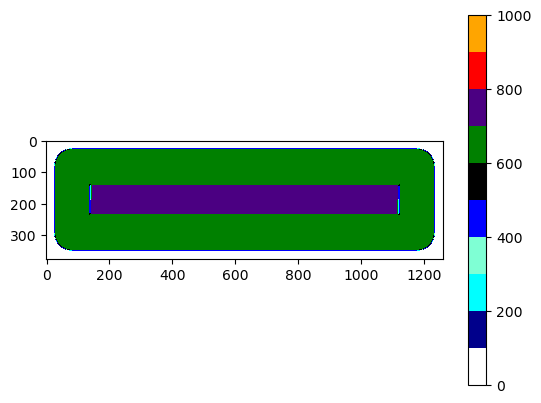

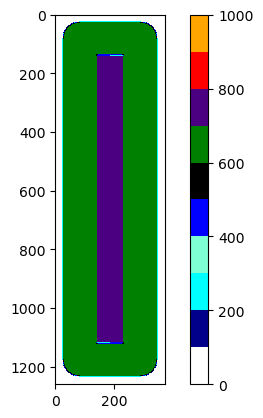

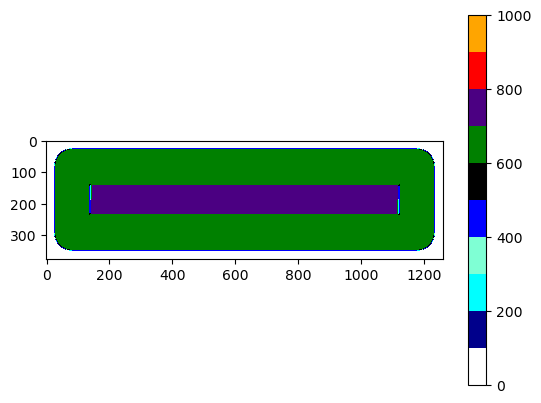

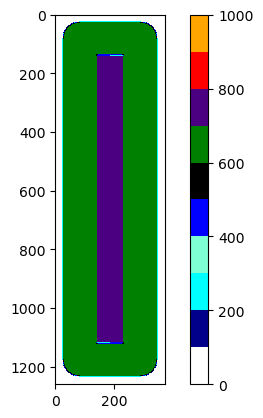

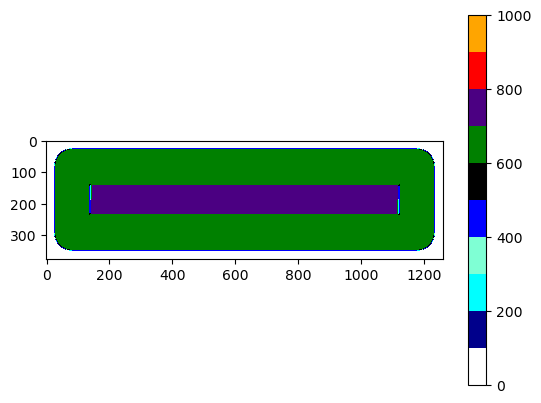

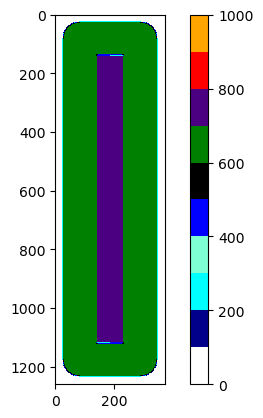

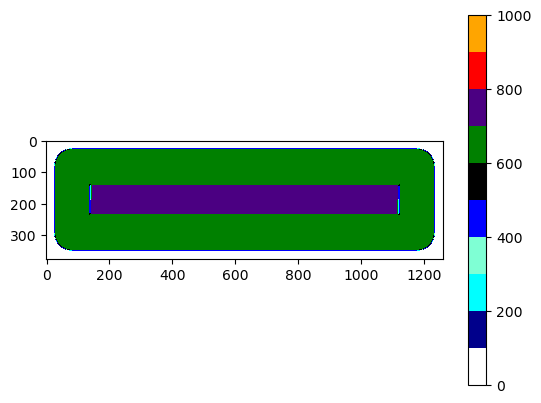

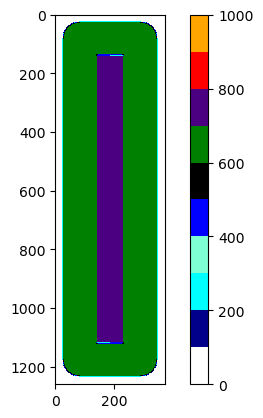

In [42]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [43]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0063898563385009766
Total de [Making offset routes] : 0.3040201663970947
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.008572101593017578
Total de [Making offset routes] : 0.32275986671447754
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.009478330612182617
Total de [Making offset routes] : 0.2858242988586426
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.008047342300415039
Total de [Making offset routes] : 0.38085246086120605
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.007712125778198242
Total de [Making offset routes] : 0.3152165412902832
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.00848245620727539
Total de [Making offset routes] : 0.3193070888519287
Making offset routes
salva

Rotas de pontes

In [44]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00018143653869628906
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 1.579186201095581
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.00018477439880371094
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02096867561340332
Total de [Camada: L_000] : 1.671114444732666
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00011444091796875
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 1.3672621250152588
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.00024437904357910156
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.015708208084106445
Total de [Camada: L_001] : 1.4292211532592773
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 9.5367431640625e-05
Making Zigzag b

Rotas de Ziguezague

In [45]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.0003097057342529297
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0019214153289794922
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0010180473327636719
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0005857944488525391
salvando grafos
Total de [salvando grafos] : 0.02228569984436035
Total de [Making zigzag routes] : 0.05433034896850586
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.00028824806213378906
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0019502639770507812
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0013158321380615234
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.000849962234

WEAVING

In [46]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.40111422538757324
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.0411229133605957
Total de [Fase 5 b] : 0.4428222179412842
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.46191930770874023
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03675127029418945
Total de [Fase 5 b] : 0.4990673065185547
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.4019639492034912
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.03775358200073242
Total de [Fase 5 b] : 0.44016265869140625
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.33870816230773926
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.0301547050476074

Rotas de Thin Walls

In [47]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.011821508407592773
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.76837158203125e-06
Total de [Making thin walls routes] : 0.012062788009643555
Total de [Fase 5] : 0.012149333953857422
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008855819702148438
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.5299530029296875e-06
Total de [Making thin walls routes] : 0.009029865264892578
Total de [Fase 5] : 0.009039640426635742
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.009634733200073242
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.0531158447265625e-06
Total de [Making thin walls routes] : 0.009834527969360352
Total de [Fase 5] : 0.009843587875366211
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008300065994262695
salvando imagens das rotas
Total

Encontrando o lugar onde será o começo da trilha de cada ilha

In [48]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0015742778778076172
Total de [Encontrando ponto de união ext-int] : 0.1968982219696045
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0013442039489746094
Total de [Encontrando ponto de união ext-int] : 0.3036072254180908
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0018985271453857422
Total de [Encontrando ponto de união ext-int] : 0.20455265045166016
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0012590885162353516
Total de [Encontrando ponto de união ext-int] : 0.30524182319641113
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001531362533569336
Total de [E

Unificando rotas EXTERNAS nas camadas

In [49]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 6: layer_{c.name}"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6: layer_L_000
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.11677837371826172
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.014550447463989258
Total de [Conectando rotas externas] : 0.18623042106628418
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0328364372253418
Total de [Fase 6: layer_L_000] : 0.21946096420288086
Fase 6: layer_L_001
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.012673616409301758
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.01451730728149414
Total de [Conectando rotas externas] : 0.07284069061279297
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.030368804931640625
Total de [Fase 6: layer_L_001] : 0.1034078598022461
Fase 6: layer_L_002
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.014969348907470703
Conec

Unificando rotas INTERNAS nas camadas

In [50]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 7: Layer_{c.name}"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7: Layer_L_000
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.03640103340148926
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.00033164024353027344
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02510809898376465
Total de [Fase 7: Layer_L_000] : 0.10957002639770508
Fase 7: Layer_L_001
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.03640341758728027
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.00042629241943359375
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.025405168533325195
Total de [Fase 7: Layer_L_001] : 0.10653471946716309
Fase 7: Layer_L_002
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.035326242446899414
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0003235340118408203
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.024424314498901367
Total de [Fase 7: Layer_L_002] : 0

Unindo rotas de thin walls

In [51]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 8: Layer_{c.name}"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8: Layer_L_000
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00026726722717285156
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.020982027053833008
Total de [Fase 8: Layer_L_000] : 0.03206372261047363
Fase 8: Layer_L_001
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00027251243591308594
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.021613359451293945
Total de [Fase 8: Layer_L_001] : 0.030791521072387695
Fase 8: Layer_L_002
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00031495094299316406
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.021605968475341797
Total de [Fase 8: Layer_L_002] : 0.0320887565612793
Fase 8: Layer_L_003
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00027561187744140625
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.022134780883789062
Total de [Fase 8: Layer_L_003] : 0.03148031234741211
Fase

Unindo todas as rotas

In [52]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.006071329116821289
Conectando todas as partes
Total de [Conectando todas as partes] : 0.640683650970459
salvando imagens das rotas
[[103, 179], [103, 606], [102, 607], [62, 607], [61, 606], [61, 82], [62, 81], [62, 76], [63, 75], [63, 74], [64, 73], [64, 72], [65, 71], [65, 70], [70, 65], [71, 65], [72, 64], [73, 64], [74, 63], [75, 63], [76, 62], [81, 62], [82, 61], [292, 61], [293, 62], [298, 62], [299, 63], [300, 63], [301, 64], [302, 64], [303, 65], [304, 65], [309, 70], [309, 71], [310, 72], [310, 73], [311, 74], [311, 75], [312, 76], [312, 81], [313, 82], [313, 1178], [312, 1179], [312, 1184], [311, 1185], [311, 1186], [310, 1187], [310, 1188], [309, 1189], [309, 1190], [304, 1195], [303, 1195], [302, 1196], [301, 1196], [300, 1197], [299, 1197], [298, 1198], [293, 1198], [292, 1199], [82, 1199], [81, 1198], [76, 1198], [75, 1197], [74, 1197], [73, 1196], [72, 1196], [71, 1195], [70, 1195], [65, 

Gerando o Código G

In [53]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_vazio, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()
configuracoes = files.Config("solda_config.yaml")

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [0+6+2.5+(i*2) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               configuracoes,
                               vel_vazio,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
trocou para 1
trocou para 2
Deslocamento total da camada 0 = 575.1098198158062mm
Tempo estimado com Vel=360.0mm/min = 1.5975272772661282min

trocou para 1
trocou para 2
Deslocamento total da camada 1 = 565.0048335736699mm
Tempo estimado com Vel=360.0mm/min = 1.5694578710379719min

trocou para 1
trocou para 2
Deslocamento total da camada 2 = 646.6788251674019mm
Tempo estimado com Vel=360.0mm/min = 1.7963300699094498min

trocou para 1
trocou para 2
Deslocamento total da camada 3 = 642.2341154976879mm
Tempo estimado com Vel=360.0mm/min = 1.783983654160244min

trocou para 1
trocou para 2
Deslocamento total da camada 4 = 646.6788251674019mm
Tempo estimado com Vel=360.0mm/min = 1.7963300699094498min

trocou para 1
trocou para 2
Deslocamento total da camada 5 = 565.0070327076816mm
Tempo estimado com Vel=360.0mm/min = 1.56946397974356min

trocou para 1
trocou para 2
Deslocamento total da camada 6 = 639.339569423158mm
Tempo estimado com Vel=360.0mm/min = 1.775943248397661min

t

Comprimento da trajetória

In [64]:
import os
import numpy as np
import math

with open("traj interna.txt") as f:
    lido = f.readlines()
    f.close()
lido = [x.strip("\n") for x in lido] 
lido = [x.split(", ") for x in lido] 
lido = lido[:-1]
lido = [[float(x[0]), float(x[1])] for x in lido]
modulos = [math.sqrt((x[0]**2)+(x[1]**2)) for x in lido]
comprimento = np.sum(modulos)
print(f'comprimento da trajetoria={comprimento}')

area_preench = 11 #mm² do imageJ
raio_toroide = 37.5 # mm medido
comp_traj = comprimento #mm do codigo G calculado acima
diam_fio = 1.2 #mm medido
area_fio = math.pi*((diam_fio/2)**2) #mm²
vol_preench = (2*math.pi*raio_toroide*area_preench)
Ws_Vd = vol_preench/(area_fio*comp_traj)
print(f'Relação de velocidades:{Ws_Vd}')

comprimento da trajetoria=107.39094342779873
Relação de velocidades:21.339477925411874


In [55]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [56]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [57]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [58]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [59]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)